<a href="https://colab.research.google.com/github/MahzuzH/sentiment-analysis-tumblr/blob/main/BigData4A_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/review_corkcicle.csv')
df.head()

,Ulasan
0,pengiriman cepat sesuai pesenan
1,"Catnya bagus, untuk ngantor paslah sore msh an..."
2,thank youuuuu
3,"Barang Berkualitas Bagus, Harga Relatif, Semog..."
4,Seller tanggap. Barang sesuai pesanan. Nyampen...


# 1. Data Cleaning

In [ ]:
df.shape

(73, 1)

In [ ]:
df = df.drop_duplicates(subset=['Ulasan'])

In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

Ulasan    0
dtype: int64

In [ ]:
df.shape

(70, 1)

In [ ]:
def clean_text(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)
  text = re.sub(r'#\w+', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?://\S+', '', text)

  text = re.sub(r"\d+", "", text)
  text = re.sub(r'[^A-Za-z0-9 ]', '', text)

  return text

df['Ulasan'] = df['Ulasan'].apply(clean_text)

In [ ]:
df['Ulasan'] = df['Ulasan'].str.lower()

In [ ]:
df

,Ulasan
0,pengiriman cepat sesuai pesenan
1,catnya bagus untuk ngantor paslah sore msh ang...
2,thank youuuuu
3,barang berkualitas bagus harga relatif semoga ...
4,seller tanggap barang sesuai pesanan nyampenya...
...,...
66,bagus bgt
67,seller responsif pengiriman cepat aman
68,ada sedikit penyok dekat tulisan merk namun ma...
69,makasih min uda pesen yg ke kali dan memuaskan...


# 2. Preprocessing

*   Normalisasi
*   Stopword
*   Tokenize
*   Stemming

In [ ]:
# Normalisasi

norm = {" yg ": " yang ", " msh ": " masih ", " dgn ": " dengan ", " ga ": " tidak "," brg ": " barang "," emg ": " emang ", " jg ": " juga ", " gak ": " tidak ", " gpp ": " tidak apa apa ", "bgt": " banget ", " mgkn ": " mungkin ",}


def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['Ulasan'] = df['Ulasan'].apply(lambda x:normalisasi(x))
df


,Ulasan
0,pengiriman cepat sesuai pesenan
1,Catnya bagus untuk ngantor paslah sore masih a...
2,thank youuuuu
3,Barang Berkualitas Bagus Harga Relatif Semoga ...
4,Seller tanggap Barang sesuai pesanan Nyampenya...
...,...
66,bagus banget
67,Seller responsif Pengiriman cepat aman
68,Ada sedikit penyok dekat tulisan merk namun ma...
69,Makasih min Uda pesen yang ke kali dan memuask...


In [ ]:
pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.6 MB/s eta 0:00:00


In [ ]:
# Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["tidak"]

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['Ulasan'] = df['Ulasan'].apply(lambda x: stopword(x))
df.head()

,Ulasan
0,pengiriman cepat sesuai pesenan
1,Catnya bagus ngantor paslah sore anget dikit
2,thank youuuuu
3,Barang Berkualitas Bagus Harga Relatif Semoga ...
4,Seller tanggap Barang sesuai pesanan Nyampenya...


In [ ]:
# Tokenize

tokenized = df['Ulasan'].apply(lambda x:x.split())
tokenized

0                  [pengiriman, cepat, sesuai, pesenan]
1     [Catnya, bagus, ngantor, paslah, sore, anget, ...
2                                      [thank, youuuuu]
3     [Barang, Berkualitas, Bagus, Harga, Relatif, S...
4     [Seller, tanggap, Barang, sesuai, pesanan, Nya...
                            ...                        
66                                      [bagus, banget]
67         [Seller, responsif, Pengiriman, cepat, aman]
68    [Ada, sedikit, penyok, dekat, tulisan, merk, m...
69    [Makasih, min, Uda, pesen, ke, kali, memuaskan...
71    [sedikit, penyot, mungkin, jelas, foto, jelas,...
Name: Ulasan, Length: 70, dtype: object

In [ ]:
# Stemming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_csv("/content/drive/MyDrive/dataset/preprocessing_review_corkcicle.csv", index=False)

kirim cepat sesuai sen
cat bagus ngantor pas sore anget dikit
thank youuuuu
barang kualitas bagus harga relatif moga awett
seller tanggap barang sesuai pesan nyampenya cepet banget
barang bagus terimakasih
selamat sehat sejahtera aman kendali recommended lah scara official store
cantik botol
layan bagus barang sesuai rekomendasi thx
semua bagus rapih suka cropcirlce
packingan sangat aman rapi barang sesuai gambar
packing aman banget mantab lah dr pagi smp sore beneran awet dingin syuukaaaa warna putih klasik
worth to buy kirim cepat gratis ongkir by tokopedia
mantap mint
mantap barang original
bahan bagus mantap kirim cepat packing aman
sesuai pesan kualitas ragu
mulus packaging kirim aman banget thank you seller
mantap
bentuk stiker barang beda botol lain sudah pernah order minta tukar yglain warna tdk bisatapi sdhlah
recommended seller
sangat muas no complain
barang sesuai admin responsif kualitas mantab moga awet
produk asli udah bagus lah tumbler classic warna putih simple minimal 

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/dataset/preprocessing_review_corkcicle.csv", encoding='latin1')
data

,Ulasan
0,kirim cepat sesuai sen
1,cat bagus ngantor pas sore anget dikit
2,thank youuuuu
3,barang kualitas bagus harga relatif moga awett
4,seller tanggap barang sesuai pesan nyampenya c...
...,...
65,bagus banget
66,seller responsif kirim cepat aman
67,ada sedikit penyok dekat tulis merk masih tole...
68,makasih min uda sen ke kali muas kirim cepat r...


# 3. Translate

In [ ]:
pip install translate

In [ ]:
from translate import Translator

def convert_eng(text):
  translator = Translator(to_lang='en', from_lang="id")
  translation = translator.translate(text)
  return translation

data['ulasan_english'] = data["Ulasan"].apply(convert_eng)
data.to_csv("/content/drive/MyDrive/dataset/terjemahan_review_corkcicle.csv")

# 4. Labelling

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/dataset/terjemahan_review_corkcicle.csv", index_col=0)
data

,Ulasan,ulasan_english
0,kirim cepat sesuai sen,send fast on cents
1,cat bagus ngantor pas sore anget dikit,nice paint ngantor pas sore anget little
2,thank youuuuu,thank youuuuuu
3,barang kualitas bagus harga relatif moga awett,good quality goods relatively good price awett
4,seller tanggap barang sesuai pesan nyampenya c...,the seller responds to the goods according to ...
...,...,...
65,bagus banget,really good
66,seller responsif kirim cepat aman,responsive seller send fast secure
67,ada sedikit penyok dekat tulis merk masih tole...,there is a slight dent near write the brand is...
68,makasih min uda sen ke kali muas kirim cepat r...,thank you min uda sen to kali muas send a quic...


In [ ]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [ ]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data_ulasan = list(data['ulasan_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, ulasan in enumerate(data_ulasan):
  analysis = TextBlob(ulasan)
  polaritas += analysis.polarity

  if analysis.sentiment.polarity > 0.0:
    total_positif += 1
    status.append("Positif")
  elif analysis.sentiment.polarity == 0.0:
    total_netral += 1
    status.append("Netral")
  else:
    total_negatif += 1
    status.append("Negatif")
  total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f"Total Data : {total}")

Hasil Analisis Data:
Positif = 53
Netral = 12
Negatif = 5
Total Data : 70


In [ ]:
data['Klasifikasi'] = status
data

,Ulasan,ulasan_english,Klasifikasi
0,kirim cepat sesuai sen,send fast on cents,Positif
1,cat bagus ngantor pas sore anget dikit,nice paint ngantor pas sore anget little,Positif
2,thank youuuuu,thank youuuuuu,Netral
3,barang kualitas bagus harga relatif moga awett,good quality goods relatively good price awett,Positif
4,seller tanggap barang sesuai pesan nyampenya c...,the seller responds to the goods according to ...,Positif
...,...,...,...
65,bagus banget,really good,Positif
66,seller responsif kirim cepat aman,responsive seller send fast secure,Positif
67,ada sedikit penyok dekat tulis merk masih tole...,there is a slight dent near write the brand is...,Negatif
68,makasih min uda sen ke kali muas kirim cepat r...,thank you min uda sen to kali muas send a quic...,Positif


# 5. Visualisasi

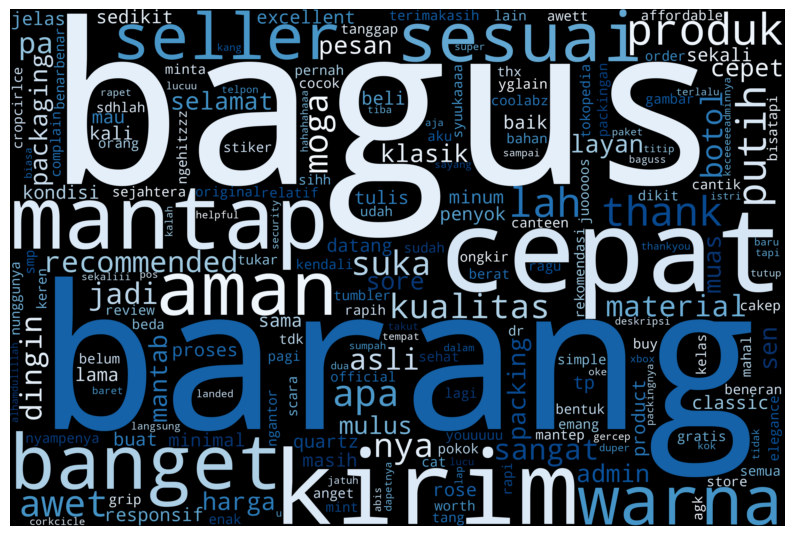

In [ ]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
  plt.figure(figsize=(10,8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

all_words = ' '.join([ulasan for ulasan in data['Ulasan']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

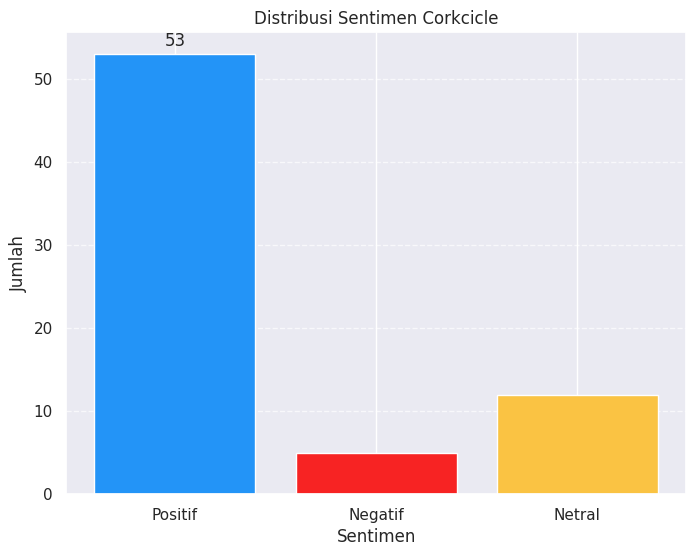

In [ ]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
  fig, ax = plt.subplots(figsize=(8,6))
  bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

  for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0,3),
                textcoords="offset points",
                ha='center', va='bottom')

    ax.grid(axis='y', linestyle='--', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Corkcicle")

# 6. Klasifikasi Sentimen

In [ ]:
data

,Ulasan,ulasan_english,Klasifikasi
0,kirim cepat sesuai sen,send fast on cents,Positif
1,cat bagus ngantor pas sore anget dikit,nice paint ngantor pas sore anget little,Positif
2,thank youuuuu,thank youuuuuu,Netral
3,barang kualitas bagus harga relatif moga awett,good quality goods relatively good price awett,Positif
4,seller tanggap barang sesuai pesan nyampenya c...,the seller responds to the goods according to ...,Positif
...,...,...,...
65,bagus banget,really good,Positif
66,seller responsif kirim cepat aman,responsive seller send fast secure,Positif
67,ada sedikit penyok dekat tulis merk masih tole...,there is a slight dent near write the brand is...,Negatif
68,makasih min uda sen ke kali muas kirim cepat r...,thank you min uda sen to kali muas send a quic...,Positif


In [ ]:
dataset = data.drop(['Ulasan'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [ ]:
import random

set_positif = []
set_negatif = []
set_netral = []

for n in dataset:
  if(n[1] == 'Positif'):
    set_positif.append(n)
  elif(n[1] == 'Negatif'):
    set_negatif.append(n)
  else:
    set_netral.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = set_positif + set_negatif + set_netral

train_set = []

for n in train:
  train_set.append(n)

In [ ]:
from textblob.classifiers import NaiveBayesClassifier

cl = NaiveBayesClassifier(train_set)
print("Akurasi Test: ", cl.accuracy(dataset))

Akurasi Test:  0.8


In [ ]:
# Labelling

data_ulasan = list(data['ulasan_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, ulasan in enumerate(data_ulasan):
  analysis = TextBlob(ulasan, classifier=cl)

  if analysis.classify() == 'Positif':
    total_positif += 1
  elif analysis.classify() == 'Netral':
    total_netral += 1
  else:
    total_negatif += 1

  status.append(analysis.classify())
  total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f"Total Data : {total}")

Hasil Analisis Data:
Positif = 67
Netral = 2
Negatif = 1
Total Data : 70


In [ ]:
status = pd.DataFrame({"Klasifikasi Bayes" : status})
data['klasikasi_bayes'] = status

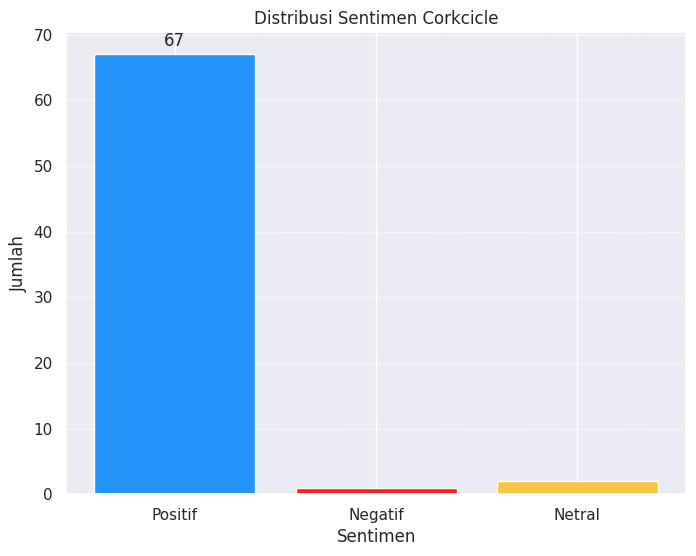

In [ ]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
  fig, ax = plt.subplots(figsize=(8,6))
  bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

  for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0,3),
                textcoords="offset points",
                ha='center', va='bottom')

    ax.grid(axis='y', linestyle='--', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Corkcicle")

In [ ]:
data

,Ulasan,ulasan_english,Klasifikasi,klasikasi_bayes
0,kirim cepat sesuai sen,send fast on cents,Positif,Positif
1,cat bagus ngantor pas sore anget dikit,nice paint ngantor pas sore anget little,Positif,Positif
2,thank youuuuu,thank youuuuuu,Netral,Positif
3,barang kualitas bagus harga relatif moga awett,good quality goods relatively good price awett,Positif,Positif
4,seller tanggap barang sesuai pesan nyampenya c...,the seller responds to the goods according to ...,Positif,Positif
...,...,...,...,...
65,bagus banget,really good,Positif,Positif
66,seller responsif kirim cepat aman,responsive seller send fast secure,Positif,Positif
67,ada sedikit penyok dekat tulis merk masih tole...,there is a slight dent near write the brand is...,Negatif,Positif
68,makasih min uda sen ke kali muas kirim cepat r...,thank you min uda sen to kali muas send a quic...,Positif,Positif


In [ ]:
data_eval = [tuple(x) for x in data.to_records(index=False)]

for n in data_eval:
  if len(n) >= 4:
    if n[2] != n[3]:
      print(f'Text: {n[0]}\nClassifier: {n[2]}\nClassifier Bayes: {n[3]} \n')
    else:
      print("Tuple tidak memiliki cukup elemen. \n")

Tuple tidak memiliki cukup elemen. 

Tuple tidak memiliki cukup elemen. 

Text: thank youuuuu
Classifier: Netral
Classifier Bayes: Positif 

Tuple tidak memiliki cukup elemen. 

Tuple tidak memiliki cukup elemen. 

Tuple tidak memiliki cukup elemen. 

Tuple tidak memiliki cukup elemen. 

Tuple tidak memiliki cukup elemen. 

Tuple tidak memiliki cukup elemen. 

Tuple tidak memiliki cukup elemen. 

Tuple tidak memiliki cukup elemen. 

Tuple tidak memiliki cukup elemen. 

Tuple tidak memiliki cukup elemen. 

Tuple tidak memiliki cukup elemen. 

Tuple tidak memiliki cukup elemen. 

Tuple tidak memiliki cukup elemen. 

Text: sesuai pesan kualitas ragu
Classifier: Negatif
Classifier Bayes: Positif 

Tuple tidak memiliki cukup elemen. 

Text: mantap
Classifier: Netral
Classifier Bayes: Positif 

Tuple tidak memiliki cukup elemen. 

Text: recommended seller
Classifier: Netral
Classifier Bayes: Positif 

Text: sangat muas no complain
Classifier: Negatif
Classifier Bayes: Positif 

Tuple tidak m